<a href="https://colab.research.google.com/github/akshay642/2090/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [3]:
pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [5]:
data = pd.read_csv('india_business_intelligence_data.csv')

In [6]:
data

,Customer_ID,Industry,Region,Customer_Segment,Marketing_Spend (INR),Website_Traffic (Visits per month),Conversion_Rate (%),Sales_Revenue (INR),Customer_Churn (%),AI_Adoption_Level,Fraud_Risk_Score,Operational_Efficiency_Score,Profit_Margin (%),Sentiment_Score
0,CUST0001,E-commerce,South India,B2C,2661196.87,54046,7.75,1942708.33,6.43,Emerging,11,18,6.56,-0.29
1,CUST0002,Retail,East India,B2C,1704365.70,66064,11.24,2990939.59,35.43,Developing,27,82,44.49,0.42
2,CUST0003,Retail,Central India,B2B,1079047.35,58184,9.21,7803444.05,18.73,Developing,38,35,30.79,-0.64
3,CUST0004,Banking & Finance,West India,B2C,4011608.05,3963,1.69,8950386.08,25.76,Emerging,36,58,33.61,-0.79
4,CUST0005,Manufacturing,South India,B2B,3141364.18,28424,3.16,7272158.19,20.64,Emerging,94,26,8.86,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST0996,E-commerce,North India,B2B,2679165.93,26280,8.12,2466353.80,25.16,Advanced,63,62,41.50,-0.58
996,CUST0997,IT Services,West India,Enterprise,774560.90,78318,10.21,3753245.52,27.91,Emerging,67,36,26.28,0.29
997,CUST0998,Retail,North India,Enterprise,741869.72,2159,9.31,5961861.41,21.21,Emerging,13,40,16.55,0.23
998,CUST0999,E-commerce,Central India,Enterprise,2937906.40,71162,4.86,3572456.83,28.38,Emerging,92,53,10.10,0.60


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoders = {}
categorical_cols = ['Industry', 'Region', 'Customer_Segment']


In [9]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [13]:
X = data[
    ['Marketing_Spend (INR)', 'Conversion_Rate (%)',
     'Sales_Revenue (INR)', 'Customer_Churn (%)', 'Fraud_Risk_Score',
     'Operational_Efficiency_Score', 'Profit_Margin (%)', 'Sentiment_Score',
     'Industry', 'Region', 'Customer_Segment']
]

# Target (dependent variable)
y = data['AI_Adoption_Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.03,
    depth=10,
    l2_leaf_reg=5,
    random_strength=1,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)


In [19]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


0:	learn: 1.0950094	total: 67.6ms	remaining: 1m 41s
100:	learn: 0.8388109	total: 7.04s	remaining: 1m 37s
200:	learn: 0.6515824	total: 12.9s	remaining: 1m 23s
300:	learn: 0.5182526	total: 19.9s	remaining: 1m 19s
400:	learn: 0.4202537	total: 25.7s	remaining: 1m 10s
500:	learn: 0.3463849	total: 32.8s	remaining: 1m 5s
600:	learn: 0.2924792	total: 38.6s	remaining: 57.7s
700:	learn: 0.2503326	total: 45.7s	remaining: 52.1s
800:	learn: 0.2183658	total: 51.5s	remaining: 45s
900:	learn: 0.1924274	total: 58.6s	remaining: 38.9s
1000:	learn: 0.1711569	total: 1m 4s	remaining: 32.1s
1100:	learn: 0.1535411	total: 1m 11s	remaining: 25.9s
1200:	learn: 0.1390114	total: 1m 17s	remaining: 19.2s
1300:	learn: 0.1269115	total: 1m 24s	remaining: 12.9s
1400:	learn: 0.1166430	total: 1m 29s	remaining: 6.36s
1499:	learn: 0.1076640	total: 1m 36s	remaining: 0us
Accuracy: 37.50%

Classification Report:
               precision    recall  f1-score   support

    Advanced       0.30      0.23      0.26        62
  Deve

In [17]:
print(y.value_counts(normalize=True))


AI_Adoption_Level
Emerging      0.368
Developing    0.327
Advanced      0.305
Name: proportion, dtype: float64


In [21]:
categorical_cols = ['Industry', 'Region', 'Customer_Segment']
label_encoders = {}


In [22]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [28]:
data['Marketing_to_Sales_Ratio'] = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)

# 2. Interactions
data['Sentiment_x_Conversion'] = data['Sentiment_Score'] * data['Conversion_Rate (%)']
data['Churn_Fraud_Interaction'] = data['Customer_Churn (%)'] * data['Fraud_Risk_Score']

# 3. Log Transform
for col in ['Marketing_Spend (INR)', 'Sales_Revenue (INR)']:
    data[f'log_{col}'] = np.log1p(data[col])


In [26]:
import numpy as np


In [30]:
X = data[
    ['Operational_Efficiency_Score', 'Fraud_Risk_Score', 'Sentiment_Score',
     'Marketing_Spend (INR)',
     'Profit_Margin (%)',
     'Industry', 'Region', 'Customer_Segment',
     'Marketing_to_Sales_Ratio', 'Sentiment_x_Conversion', 'Churn_Fraud_Interaction',
     'log_Marketing_Spend (INR)', 'log_Sales_Revenue (INR)']
]

# Target
y = data['AI_Adoption_Level']

print(X.shape)
print(X.columns)

(1000, 13)
Index(['Operational_Efficiency_Score', 'Fraud_Risk_Score', 'Sentiment_Score',
       'Marketing_Spend (INR)', 'Profit_Margin (%)', 'Industry', 'Region',
       'Customer_Segment', 'Marketing_to_Sales_Ratio',
       'Sentiment_x_Conversion', 'Churn_Fraud_Interaction',
       'log_Marketing_Spend (INR)', 'log_Sales_Revenue (INR)'],
      dtype='object')


In [31]:
print(X.shape)
print(X.columns)

(1000, 13)
Index(['Operational_Efficiency_Score', 'Fraud_Risk_Score', 'Sentiment_Score',
       'Marketing_Spend (INR)', 'Profit_Margin (%)', 'Industry', 'Region',
       'Customer_Segment', 'Marketing_to_Sales_Ratio',
       'Sentiment_x_Conversion', 'Churn_Fraud_Interaction',
       'log_Marketing_Spend (INR)', 'log_Sales_Revenue (INR)'],
      dtype='object')


In [32]:
X = data[[
    'Operational_Efficiency_Score',
    'Fraud_Risk_Score',
    'Sentiment_Score',
    'Marketing_Spend (INR)',
    'Profit_Margin (%)',
    'Industry',
    'Region',
    'Customer_Segment',
    'Marketing_to_Sales_Ratio',
    'Sentiment_x_Conversion',
    'Churn_Fraud_Interaction',
    'log_Marketing_Spend (INR)',
    'log_Sales_Revenue (INR)'
]]

In [33]:
y = data['AI_Adoption_Level']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 7) Build & train CatBoostClassifier
model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.03,
    depth=10,
    l2_leaf_reg=5,
    random_strength=1,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)
model.fit(X_train, y_train)

0:	learn: 1.0954668	total: 82.4ms	remaining: 2m 3s
100:	learn: 0.8450697	total: 8.24s	remaining: 1m 54s
200:	learn: 0.6686299	total: 16.7s	remaining: 1m 48s
300:	learn: 0.5377942	total: 25.2s	remaining: 1m 40s
400:	learn: 0.4395015	total: 32.4s	remaining: 1m 28s
500:	learn: 0.3681430	total: 40.9s	remaining: 1m 21s
600:	learn: 0.3122241	total: 49.4s	remaining: 1m 13s
700:	learn: 0.2686247	total: 56.6s	remaining: 1m 4s
800:	learn: 0.2349472	total: 1m 5s	remaining: 56.8s
900:	learn: 0.2078423	total: 1m 12s	remaining: 48.2s
1000:	learn: 0.1851463	total: 1m 20s	remaining: 40.3s
1100:	learn: 0.1669126	total: 1m 29s	remaining: 32.3s
1200:	learn: 0.1511414	total: 1m 36s	remaining: 24s
1300:	learn: 0.1380607	total: 1m 44s	remaining: 16.1s
1400:	learn: 0.1266925	total: 1m 53s	remaining: 8.02s
1499:	learn: 0.1168521	total: 2m	remaining: 0us


In [35]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> Test Accuracy: {acc * 100:.2f}%\n")
print(classification_report(y_test, y_pred))


>>> Test Accuracy: 40.00%

              precision    recall  f1-score   support

    Advanced       0.31      0.30      0.30        61
  Developing       0.39      0.35      0.37        65
    Emerging       0.47      0.53      0.50        74

    accuracy                           0.40       200
   macro avg       0.39      0.39      0.39       200
weighted avg       0.40      0.40      0.40       200



In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt


In [38]:
for col in ['Industry', 'Region', 'Customer_Segment']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# 4) Feature Engineering
#    – use the exact column name “Website_Traffic (Visits per month)”
data['Marketing_to_Sales_Ratio'] = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)
data['Sentiment_x_Conversion']   = data['Sentiment_Score'] * data['Conversion_Rate (%)']
data['Churn_Fraud_Interaction']  = data['Customer_Churn (%)'] * data['Fraud_Risk_Score']
data['log_Marketing_Spend']      = np.log1p(data['Marketing_Spend (INR)'])
data['log_Sales_Revenue']        = np.log1p(data['Sales_Revenue (INR)'])
data['log_Website_Traffic']      = np.log1p(data['Website_Traffic (Visits per month)'])

# 5) Select features & target
FEATURES = [
    'Operational_Efficiency_Score',
    'Fraud_Risk_Score',
    'Sentiment_Score',
    'Marketing_Spend (INR)',
    'Website_Traffic (Visits per month)',
    'Profit_Margin (%)',
    'Industry',
    'Region',
    'Customer_Segment',
    'Marketing_to_Sales_Ratio',
    'Sentiment_x_Conversion',
    'Churn_Fraud_Interaction',
    'log_Marketing_Spend',
    'log_Sales_Revenue',
    'log_Website_Traffic'
]
X = data[FEATURES]
y = data['AI_Adoption_Level']

# 6) Train–test split (stratify to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7) Build & train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=100
)

# 8) Predict & evaluate
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> Test Accuracy: {acc * 100:.2f}%\n")
print(classification_report(y_test, y_pred))


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [39]:
# 3) Encode categorical variables
for col in ['Industry', 'Region', 'Customer_Segment']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# 4) Feature Engineering
data['Marketing_to_Sales_Ratio'] = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)
data['Sentiment_x_Conversion']   = data['Sentiment_Score'] * data['Conversion_Rate (%)']
data['Churn_Fraud_Interaction']  = data['Customer_Churn (%)'] * data['Fraud_Risk_Score']
data['log_Marketing_Spend']      = np.log1p(data['Marketing_Spend (INR)'])
data['log_Sales_Revenue']        = np.log1p(data['Sales_Revenue (INR)'])
data['log_Website_Traffic']      = np.log1p(data['Website_Traffic (Visits per month)'])

# 5) Select features & target
FEATURES = [
    'Operational_Efficiency_Score',
    'Fraud_Risk_Score',
    'Sentiment_Score',
    'Marketing_Spend (INR)',
    'Website_Traffic (Visits per month)',
    'Profit_Margin (%)',
    'Industry',
    'Region',
    'Customer_Segment',
    'Marketing_to_Sales_Ratio',
    'Sentiment_x_Conversion',
    'Churn_Fraud_Interaction',
    'log_Marketing_Spend',
    'log_Sales_Revenue',
    'log_Website_Traffic'
]
X = data[FEATURES]
y = data['AI_Adoption_Level']

# 6) Train–test split (stratify to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 7) Build & train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# NOTE: we omit early_stopping_rounds
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='mlogloss',
    verbose=100
)

# 8) Predict & evaluate
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> Test Accuracy: {acc * 100:.2f}%\n")
print(classification_report(y_test, y_pred))

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'

In [40]:
for col in ['Industry', 'Region', 'Customer_Segment']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# 4) Feature Engineering
data['Marketing_to_Sales_Ratio'] = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)
data['Sentiment_x_Conversion']   = data['Sentiment_Score'] * data['Conversion_Rate (%)']
data['Churn_Fraud_Interaction']  = data['Customer_Churn (%)'] * data['Fraud_Risk_Score']
data['log_Marketing_Spend']      = np.log1p(data['Marketing_Spend (INR)'])
data['log_Sales_Revenue']        = np.log1p(data['Sales_Revenue (INR)'])
data['log_Website_Traffic']      = np.log1p(data['Website_Traffic (Visits per month)'])

# 5) Select features & target
FEATURES = [
    'Operational_Efficiency_Score',
    'Fraud_Risk_Score',
    'Sentiment_Score',
    'Marketing_Spend (INR)',
    'Website_Traffic (Visits per month)',
    'Profit_Margin (%)',
    'Industry',
    'Region',
    'Customer_Segment',
    'Marketing_to_Sales_Ratio',
    'Sentiment_x_Conversion',
    'Churn_Fraud_Interaction',
    'log_Marketing_Spend',
    'log_Sales_Revenue',
    'log_Website_Traffic'
]
X = data[FEATURES]
y = data['AI_Adoption_Level']

# 6) Train–test split (stratify to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 7) Build & train XGBoost classifier
params = {
    'n_estimators': 800,
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'use_label_encoder': False,
    'random_state': 42,
    'n_jobs': -1
}

xgb_model = xgb.XGBClassifier(**params)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# 8) Predict & evaluate
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> Test Accuracy: {acc * 100:.2f}%\n")
print(classification_report(y_test, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Advanced' 'Developing' 'Emerging']

In [41]:
for col in ['Industry', 'Region', 'Customer_Segment']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Encode the target variable 'AI_Adoption_Level' into numeric values
target_encoder = LabelEncoder()
data['AI_Adoption_Level'] = target_encoder.fit_transform(data['AI_Adoption_Level'])

# 4) Feature Engineering
data['Marketing_to_Sales_Ratio'] = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)
data['Sentiment_x_Conversion']   = data['Sentiment_Score'] * data['Conversion_Rate (%)']
data['Churn_Fraud_Interaction']  = data['Customer_Churn (%)'] * data['Fraud_Risk_Score']
data['log_Marketing_Spend']      = np.log1p(data['Marketing_Spend (INR)'])
data['log_Sales_Revenue']        = np.log1p(data['Sales_Revenue (INR)'])
data['log_Website_Traffic']      = np.log1p(data['Website_Traffic (Visits per month)'])

# 5) Select features & target
FEATURES = [
    'Operational_Efficiency_Score',
    'Fraud_Risk_Score',
    'Sentiment_Score',
    'Marketing_Spend (INR)',
    'Website_Traffic (Visits per month)',
    'Profit_Margin (%)',
    'Industry',
    'Region',
    'Customer_Segment',
    'Marketing_to_Sales_Ratio',
    'Sentiment_x_Conversion',
    'Churn_Fraud_Interaction',
    'log_Marketing_Spend',
    'log_Sales_Revenue',
    'log_Website_Traffic'
]
X = data[FEATURES]
y = data['AI_Adoption_Level']

# 6) Train–test split (stratify to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 7) Build & train XGBoost classifier
params = {
    'n_estimators': 800,
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'use_label_encoder': False,
    'random_state': 42,
    'n_jobs': -1
}

xgb_model = xgb.XGBClassifier(**params)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# 8) Predict & evaluate
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> Test Accuracy: {acc * 100:.2f}%\n")
print(classification_report(y_test, y_pred))

[0]	validation_0-mlogloss:1.09645


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-mlogloss:1.16064
[200]	validation_0-mlogloss:1.24653
[300]	validation_0-mlogloss:1.31941
[400]	validation_0-mlogloss:1.38422
[500]	validation_0-mlogloss:1.45467
[600]	validation_0-mlogloss:1.50845
[700]	validation_0-mlogloss:1.55364
[799]	validation_0-mlogloss:1.59341

>>> Test Accuracy: 36.50%

              precision    recall  f1-score   support

           0       0.33      0.36      0.35        61
           1       0.33      0.34      0.33        65
           2       0.43      0.39      0.41        74

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.37      0.36      0.37       200



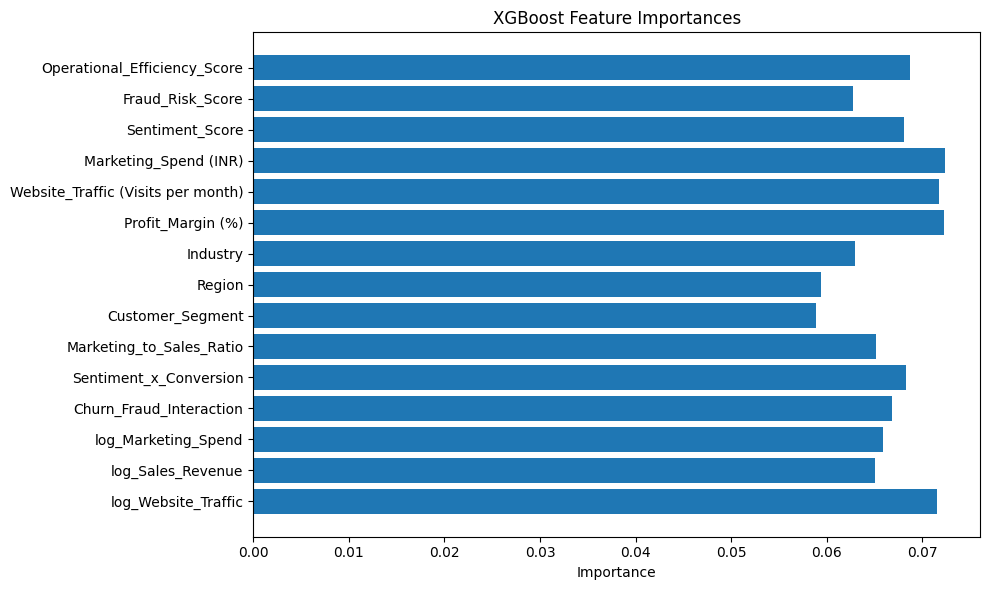

In [42]:
fi = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(FEATURES, fi)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [44]:
param_dist = {
    'n_estimators': [300, 500, 800, 1200],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) Wrap XGBClassifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

In [46]:
search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 5) Fit & report best
search.fit(X, y)
print("Best params:", search.best_params_)
print("Best CV accuracy:", search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 1200, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best CV accuracy: 0.394


In [47]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [48]:
lgb_clf = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

scores = cross_val_score(lgb_clf, X, y, cv=5, scoring='accuracy')
print("LightGBM CV accuracy:", scores.mean())

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model1 = RandomForestClassifier(random_state=42)
model2 = xgb.XGBClassifier(random_state=42)
model3 = SVC(random_state=42)

voting_model = VotingClassifier(estimators=[('rf', model1), ('xgb', model2), ('svc', model3)], voting='hard')

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)


In [50]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {acc_mlp * 100:.2f}%")


MLP Accuracy: 37.00%


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [53]:
for col in ['Industry','Region','Customer_Segment','AI_Adoption_Level']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# 2) Feature engineering (same as before)
data['Marketing_to_Sales_Ratio']   = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)
data['Sentiment_x_Conversion']     = data['Sentiment_Score'] * data['Conversion_Rate (%)']
data['Churn_Fraud_Interaction']    = data['Customer_Churn (%)'] * data['Fraud_Risk_Score']
data['log_Marketing_Spend']        = np.log1p(data['Marketing_Spend (INR)'])
data['log_Sales_Revenue']          = np.log1p(data['Sales_Revenue (INR)'])
data['log_Website_Traffic']        = np.log1p(data['Website_Traffic (Visits per month)'])

# 3) Build feature matrix for clustering
FEATURES = [
    'Operational_Efficiency_Score','Fraud_Risk_Score','Sentiment_Score',
    'Marketing_Spend (INR)','Website_Traffic (Visits per month)','Profit_Margin (%)',
    'Marketing_to_Sales_Ratio','Sentiment_x_Conversion','Churn_Fraud_Interaction',
    'log_Marketing_Spend','log_Sales_Revenue','log_Website_Traffic'
]
X = data[FEATURES]

# 4) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) Silhouette analysis to pick k (2–6)
sil_scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

best_k = max(sil_scores, key=sil_scores.get)
print("Silhouette scores:", sil_scores)
print(f"Best k by silhouette: {best_k}")

# 6) Fit KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# 7) Cluster sizes and centroids (in original feature space)
print("\nCluster sizes:")
print(data['Cluster'].value_counts().sort_index())

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                         columns=FEATURES)
centroids.index.name = 'Cluster'
print("\nCluster centroids:")
print(centroids)

# 8) 2D PCA visualization
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_scaled)


Silhouette scores: {2: np.float64(0.11549603876168285), 3: np.float64(0.11733970168856214), 4: np.float64(0.12287317730581201), 5: np.float64(0.12402969590087494), 6: np.float64(0.1200784416915608)}
Best k by silhouette: 5

Cluster sizes:
Cluster
0    252
1    279
2    216
3     39
4    214
Name: count, dtype: int64

Cluster centroids:
         Operational_Efficiency_Score  Fraud_Risk_Score  Sentiment_Score  \
Cluster                                                                    
0                           55.198413         54.583333        -0.579802   
1                           57.440860         47.383513         0.527061   
2                           52.819444         46.949074        -0.194074   
3                           50.487179         63.487179        -0.081538   
4                           50.719626         53.785047         0.137523   

         Marketing_Spend (INR)  Website_Traffic (Visits per month)  \
Cluster                                                    

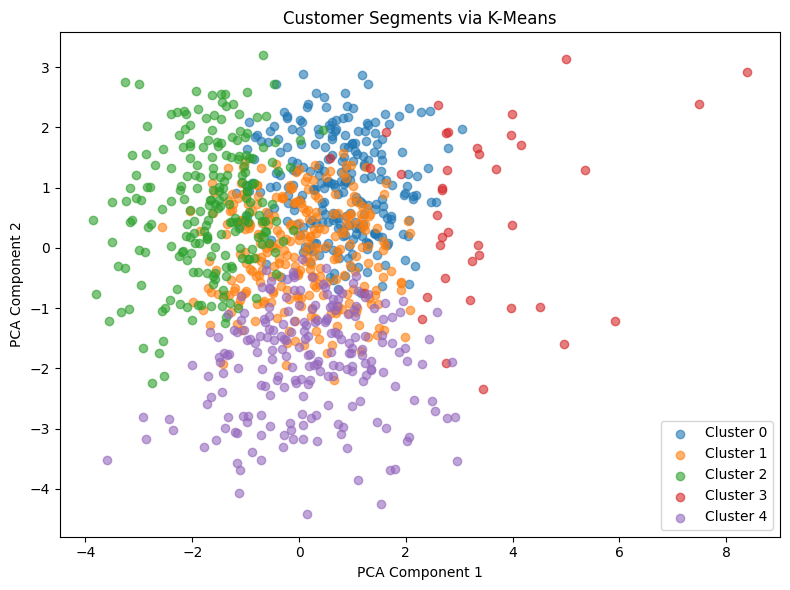

In [54]:
plt.figure(figsize=(8,6))
for c in range(best_k):
    idx = clusters == c
    plt.scatter(proj[idx,0], proj[idx,1], label=f'Cluster {c}', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments via K-Means')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
pip install gradio scikit-learn pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00


In [56]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [57]:
data['Marketing_to_Sales_Ratio'] = data['Marketing_Spend (INR)'] / (data['Sales_Revenue (INR)'] + 1)
data['log_Marketing_Spend'] = np.log1p(data['Marketing_Spend (INR)'])
data['log_Sales_Revenue'] = np.log1p(data['Sales_Revenue (INR)'])

# Define features and target
features = ['Marketing_Spend (INR)', 'Website_Traffic (Visits per month)', 'Customer_Churn (%)', 'Fraud_Risk_Score', 'log_Marketing_Spend', 'log_Sales_Revenue', 'Marketing_to_Sales_Ratio']
target = 'Sales_Revenue (INR)'

In [58]:
X = data[features]
y = data[target]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model (RandomForest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Gradio function to predict sales revenue
def predict_sales(Marketing_Spend, Website_Traffic, Customer_Churn, Fraud_Risk, Marketing_Spend_log, Sales_Revenue_log, Marketing_to_Sales_Ratio):
    input_data = np.array([[Marketing_Spend, Website_Traffic, Customer_Churn, Fraud_Risk, Marketing_Spend_log, Sales_Revenue_log, Marketing_to_Sales_Ratio]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return f"Predicted Sales Revenue: ₹{prediction[0]:,.2f}"

# Gradio Interface
interface = gr.Interface(
    fn=predict_sales,
    inputs=[
        gr.Slider(1000, 1000000, step=1000, label="Marketing Spend (INR)"),
        gr.Slider(1000, 100000, step=1000, label="Website Traffic (Visits per month)"),
        gr.Slider(0, 100, step=0.1, label="Customer Churn (%)"),
        gr.Slider(0, 100, step=0.1, label="Fraud Risk Score"),
        gr.Slider(1000, 1000000, step=1000, label="Log of Marketing Spend (INR)"),
        gr.Slider(1000, 1000000, step=1000, label="Log of Sales Revenue (INR)"),
        gr.Slider(0.1, 5, step=0.1, label="Marketing to Sales Ratio")
    ],
    outputs="text",
    live=True
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7e520ba87804e27aa0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
